In [87]:
from keras.datasets import mnist #keras.datasetsからmnistをインポートする
import numpy as np #numpyをnpとして扱う
import matplotlib.pyplot as plt #matplotlib.pyplot を pltとして扱う

In [88]:
(x_train,y_train),(x_test,y_test) = mnist.load_data() #訓練用とテスト用のmnistデータを作る

In [89]:
plt.figure(1,figsize=(12,3.2)) #グラフのわくのサイズを指定
plt.subplots_adjust(wspace=0.5) #グラフの幅を0.5に指定
plt.gray() #グラフの色を灰色に指定

<Figure size 864x230.4 with 0 Axes>

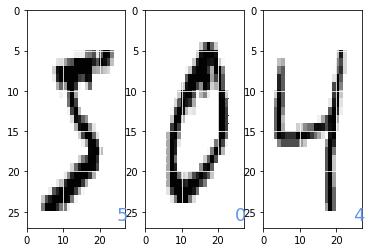

In [90]:
for id in range(3): #　mnistの最初に3つのデータを表示する
    plt.subplot(1,3,id+1) #グラフを1行3列に分割し、サブ領域の番号を指定
    img = x_train[id, :, :] #x_trainデータをスライス
    plt.pcolor(255-img) #色の強弱をつける
    plt.text(24.5,26,"%d" % y_train[id], color="cornflowerblue", fontsize=18) #xの24.5、yの26の位置にcornflowerblue色の、18サイズの%ｄを指定
    plt.xlim(0,27) #x軸の表示範囲を指定
    plt.ylim(27,0) #y軸の表示範囲を指定
    plt.grid("on", color="white") #グリッドの色を白に指定
plt.show() #グラフを表示

In [91]:
#28×28の画像データを784のベクトルとして扱う

from keras.utils import np_utils #keras.utilsのnp_utilsをインポート

x_train = x_train.reshape(60000, 784) #60000行、784（28×28）列の配列に指定
x_train = x_train.astype("float32") #x_trainのデータの型をfloat32に変換
x_train = x_train / 255 #x_trainを255で割る
num_classes = 10 #　変数に収納
y_train = np_utils.to_categorical(y_train,num_classes) #ベクトルに変換したいラベルをy_train、ベクトルは配列の個数をnum_classesに指定（1-of-K符号化法）

x_test = x_test.reshape(10000, 784) #10000行、784列の配列に指定
x_test = x_test.astype("float32") #x_testのデータの型をfloat32に変換
x_test = x_test / 255 #x_testを255で割る
y_test = np_utils.to_categorical(y_test, num_classes) #ベクトルに変換したいラベルをy_test、ベクトルは配列の個数をnum_classesに指定


In [92]:
#ネットワークの定義
np.random.seed(1) #乱数の固定
from keras.models import Sequential #keras.modelsからSequentialをインポート
from keras.layers import Dense,Activation #keras.layersからDense,Activationをインポート
from keras.optimizers import Adam #keras.optimizersからAdamをインポート

model = Sequential() #線形のモデルを定義
model.add(Dense(16, input_dim=784, activation="sigmoid")) #784次元、16個の中間層を定義
model.add(Dense(10, activation="softmax")) #10個の出力層を定義
model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"]) #勾配法を洗練させたAdamuで学習

In [93]:
import time # timeをインポート

startTime = time.time() #unix時間をfloat型で入手
history = model.fit(x_train,y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test,y_test))
#x_train,y_trainにより訓練を実行 エポック数10,バッチサイズ1000, verbose=1, x_test,y_testを訓練に含まれないデータとして 

score = model.evaluate(x_test,y_test, verbose=0) #損失値の計算、どのくらい正しい学習をしているのか確かめる
print("Test loss:", score[0]) #scoreの0を表示
print("Conputation time:{0:.3f}sec".format(time.time() - startTime))#学習時間を表示

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 0s 8us/step - loss: 2.0612 - accuracy: 0.2890 - val_loss: 1.7858 - val_accuracy: 0.5007
Epoch 2/10
60000/60000 [==============================] - 0s 7us/step - loss: 1.6053 - accuracy: 0.6519 - val_loss: 1.4368 - val_accuracy: 0.7672
Epoch 3/10
60000/60000 [==============================] - 0s 7us/step - loss: 1.3190 - accuracy: 0.7883 - val_loss: 1.1978 - val_accuracy: 0.8200
Epoch 4/10
60000/60000 [==============================] - 0s 6us/step - loss: 1.1126 - accuracy: 0.8248 - val_loss: 1.0186 - val_accuracy: 0.8445
Epoch 5/10
60000/60000 [==============================] - 0s 7us/step - loss: 0.9540 - accuracy: 0.8437 - val_loss: 0.8790 - val_accuracy: 0.8588
Epoch 6/10
60000/60000 [==============================] - 0s 7us/step - loss: 0.8304 - accuracy: 0.8589 - val_loss: 0.7714 - val_accuracy: 0.8710
Epoch 7/10
60000/60000 [==============================] - 0s 7us/step - lo

Text(0, 0.5, 'accuracy')

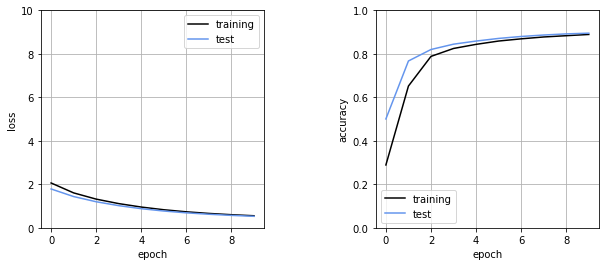

In [94]:
import numpy as np #numpyをnpとして扱う
import matplotlib.pyplot as plt #matplotlib.pyplotをpltとして扱う

plt.figure(1, figsize=(10,4)) #グラフのわくのサイズを指定
plt.subplots_adjust(wspace=0.5) #グラフのメモリを指定

plt.subplot(1,2,1) #グラフを1行2列に分割し、サブ領域の番号を1に指定
plt.plot(history.history["loss"], label="training", color="black") #黒のtrainingのグラフを表示
plt.plot(history.history["val_loss"], label="test", color="cornflowerblue") #青のtest用のグラフの表示
plt.ylim(0,10) #y軸の表示範囲を指定
plt.legend() #グラフをプロット
plt.grid() #グリッドの表示
plt.xlabel("epoch") #x軸のラベル指定
plt.ylabel("loss") #y軸のラベル指定

plt.subplot(1,2,2) #グラフを1行2列に分割し、サブ領域の番号を2に指定
plt.plot(history.history["accuracy"], label="training", color="black") #黒のtrainingのグラフを表示
plt.plot(history.history["val_accuracy"], label="test", color="cornflowerblue") #青のtest用のグラフの表示
plt.ylim(0,1) #y軸の表示範囲を指定
plt.legend() #グラフをプロッ
plt.grid() #グリッドの表示
plt.xlabel("epoch") #x軸のラベル指定
plt.ylabel("accuracy" ) #y軸のラベル指定


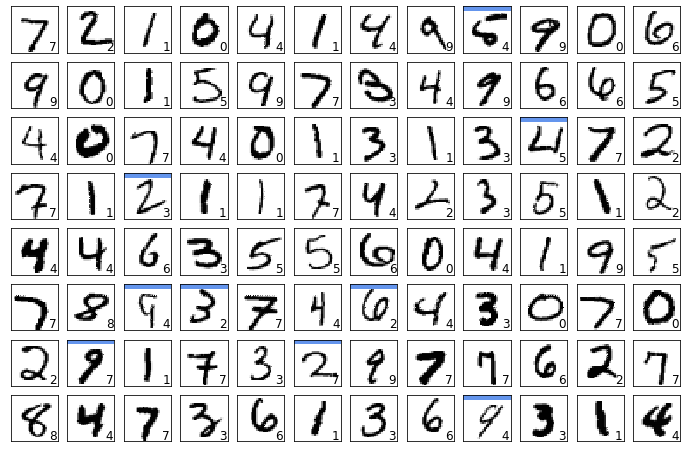

In [95]:
def show_prediction():
    n_show = 96 #変数の収納
    y = model.predict(x_test) #x_testのすべてに対するモデルを収納
    plt.figure(2, figsize=(12,8)) #グラフのわくのサイズを指定
    plt.gray() #グラフの色を指定
    
    for i in range(n_show): #96回for文を実行
        plt.subplot(8,12,i+1) #グラフを8行12列に分割し、サブ領域の番号をi+1に指定
        x = x_test[i,:] #x_testのスライス
        x = x.reshape(28,28) #28行、28列の配列に変換
        plt.pcolor(1-x) #グラフの濃淡を指定
        wk = y[i, :] #yをスライス
        prediction= np.argmax(wk) #wkの最大要素のインデックスを収納
        plt.text(22,25.5, "%d" % prediction, fontsize=12) #22,25.5の位置に％dを表示
        if prediction != np.argmax(y_test[i,:]): #訓練用とテスト用のpredictionが同じなら
            plt.plot([0,27], [1,1], color="cornflowerblue", linewidth=5) #太さ5の青色のラインを表示
        plt.xlim(0,27) #x軸の範囲を指定
        plt.ylim(27,0) #y軸の範囲を指定
        plt.xticks([],"") #x軸のメモリを指定
        plt.yticks([],"") #y軸のメモリを指定
        
show_prediction() #show_prediction関数の実行
plt.show() #グラフの表示